# Yeni Bölüm

In [ ]:
import import_ipynb
import numpy as np
import pandas as pd
from preprocessing import load_data,clean_data, preprocessing,vectorize, split_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Embedding,LSTM
from tensorflow.keras.optimizers import Adam

In [ ]:
df = load_data("Phishing_Email.csv")
df = clean_data(df)
df['Email Text'] = df['Email Text'].apply(preprocessing)
tf,X,y = vectorize(df)

<string>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 150

tk = Tokenizer()

tk.fit_on_texts(df['Email Text'])
sequences = tk.texts_to_sequences(df['Email Text'])
vector = pad_sequences(sequences,padding='post', maxlen=max_len)

X = np.array(vector)
y = np.array(df["Email Type"])

X_train, X_test, y_train, y_test = split_data(X,y)


In [ ]:
from tensorflow.keras.regularizers import l2
model = Sequential()
model.add(Embedding(input_dim=len(tk.word_index) + 1, output_dim=128, input_length=max_len))
model.add(LSTM(32, return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(LSTM(16, return_sequences=True,kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(LSTM(8, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()




optimizer = Adam(learning_rate=0.0001)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,           # Öğrenme oranını yarıya indir
    patience=2,           # 2 epoch boyunca iyileşme yoksa uygula
    min_lr=0.000001          # En düşük öğrenme oranı
)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    callbacks=[reduce_lr],
    verbose=1
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
839/839 ━━━━━━━━━━━━━━━━━━━━ 36s 33ms/step - accuracy: 0.6243 - loss: 1.8848 - val_accuracy: 0.8605 - val_loss: 0.8046 - learning_rate: 1.0000e-04
Epoch 2/50
839/839 ━━━━━━━━━━━━━━━━━━━━ 36s 32ms/step - accuracy: 0.8685 - loss: 0.7261 - val_accuracy: 0.8558 - val_loss: 0.5083 - learning_rate: 1.0000e-04
Epoch 3/50
839/839 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/step - accuracy: 0.8998 - loss: 0.4460 - val_accuracy: 0.8920 - val_loss: 0.3913 - learning_rate: 1.0000e-04
Epoch 4/50
839/839 ━━━━━━━━━━━━━━━━━━━━ 27s 32ms/step - accuracy: 0.8951 - loss: 0.4166 - val_accuracy: 0.9175 - val_loss: 0.3471 - learning_rate: 1.0000e-04
Epoch 5/50
839/839 ━━━━━━━━━━━━━━━━━━━━ 41s 32ms/step - accuracy: 0.9354 - loss: 0.3059 - val_accuracy: 0.9450 - val_loss: 0.2524 - learning_rate: 1.0000e-04
Epoch 6/50
839/839 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.9622 - loss: 0.2320 - val_accuracy: 0.9336 - val_loss: 0.2877 - learning_rate: 1.0000e-04
Epoch 7/50
839/839 ━━━━━━━━━━━━━━━━━━━━ 26s 31ms/ste

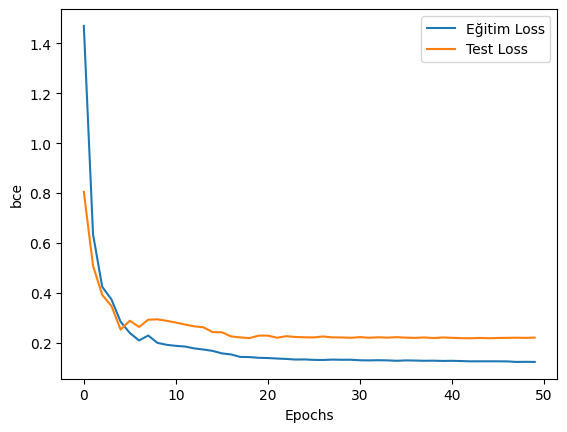

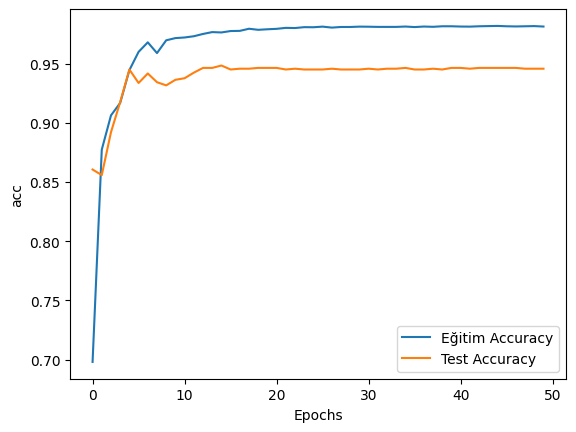

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Eğitim Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('bce')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Eğitim Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9547 - loss: 0.1977


[0.1937427818775177, 0.9546552300453186]

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


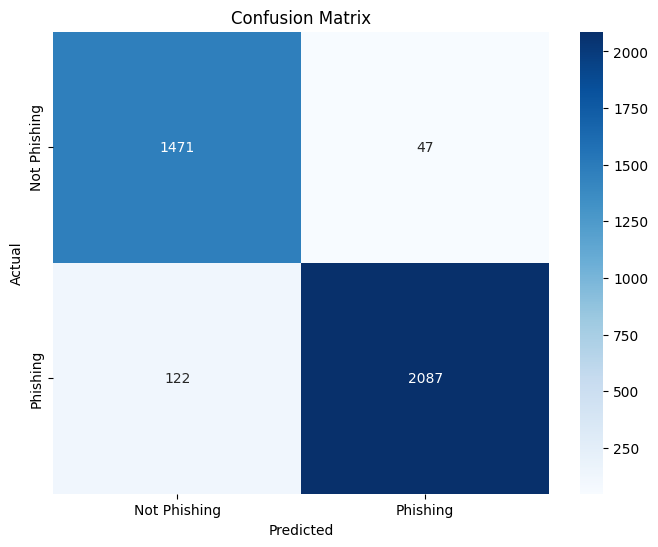

              precision    recall  f1-score   support

Not Phishing       0.92      0.97      0.95      1518
    Phishing       0.98      0.94      0.96      2209

    accuracy                           0.95      3727
   macro avg       0.95      0.96      0.95      3727
weighted avg       0.96      0.95      0.95      3727



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Phishing', 'Phishing'], yticklabels=['Not Phishing', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred, target_names=['Not Phishing', 'Phishing']))